<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/Introdu%C3%A7%C3%A3o_a_Machine_Learning_e_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1

In [1]:
# features
# pelo longo?
# perna curta?
# late!!?

porco1 = [0, 1, 0]
porco2 = [0 ,1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 0, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

In [2]:
# 1 => porco, 0 => cachorro
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] #labels / etiquetas

In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [4]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [5]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0,1,1]

In [6]:
previsoes = model.predict(teste_x)

In [7]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total
print(f'Taxa de acerto: {taxa_de_acerto*100:.2f}%')

Taxa de acerto: 100.00%


In [8]:
from sklearn.metrics import accuracy_score

In [9]:
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'Taxa de acerto: {taxa_de_acerto*100:.2f}%')

Taxa de acerto: 100.00%


# Parte 2

In [10]:
import pandas as pd

In [11]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv')
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [12]:
mapa = {'home': 'principal',
        'how_it_works': 'como_funciona',
        'contact': 'contato',
        'bought': 'comprou'}
dados = dados.rename(columns=mapa)

In [13]:
x = dados[['principal', 'como_funciona', 'contato']]
y = dados['comprou']

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [15]:
dados.shape

(99, 4)

In [16]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

Treinaremos com 75 elementos e testaremos com 24 elementos.


In [17]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A precisão foi de {acuracia*100:.2f}%')

A precisão foi de 95.83%


## Usando a biblioteca para separar treino e teste

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

seed = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=seed)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A precisão foi de {acuracia*100:.2f}%')

Treinaremos com 74 elementos e testaremos com 25 elementos.
A precisão foi de 96.00%


In [19]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [20]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

seed = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=seed,
                                                        stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A precisão foi de {acuracia*100:.2f}%')

Treinaremos com 74 elementos e testaremos com 25 elementos.
A precisão foi de 96.00%


In [22]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [23]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

# Parte 3

In [116]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [117]:
a_renomear = {'expected_hours': 'horas_esperadas',
              'unfinished': 'nao_finalizado',
              'price': 'preco'}
dados = dados.rename(columns=a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [118]:
troca = {0 : 1,
         1 : 0}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [119]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [120]:
import seaborn as sns

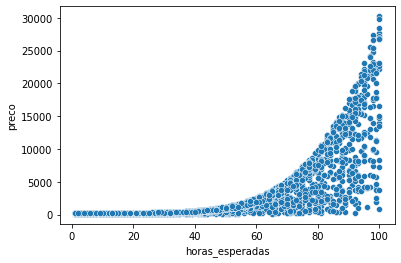

In [121]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados);

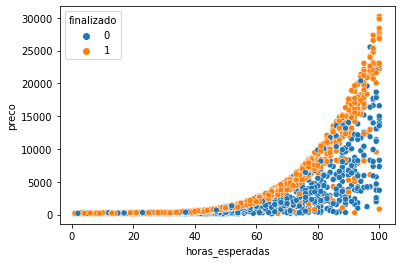

In [122]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados, hue='finalizado');

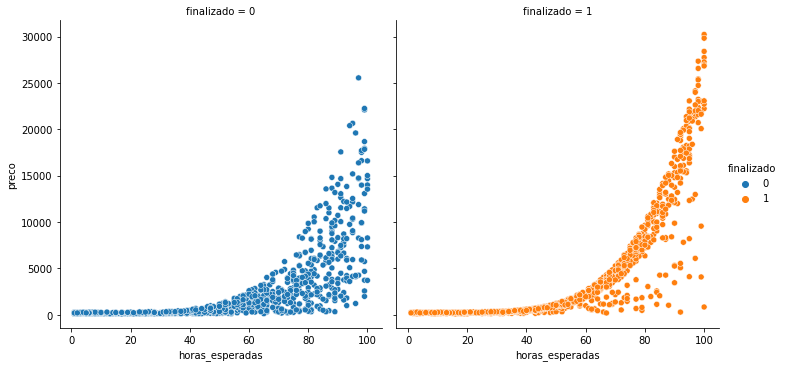

In [123]:
sns.relplot(x='horas_esperadas', y='preco', data=dados, col='finalizado', hue='finalizado');

In [124]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A precisão foi de {acuracia*100:.2f}%\n')

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A precisão foi de 64.44%



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [126]:
import numpy as np
previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y, previsoes_de_base)
print(f'A precisão do algoritmo de baseline foi de {acuracia*100:.2f}%\n')

A precisão do algoritmo de baseline foi de 52.59%



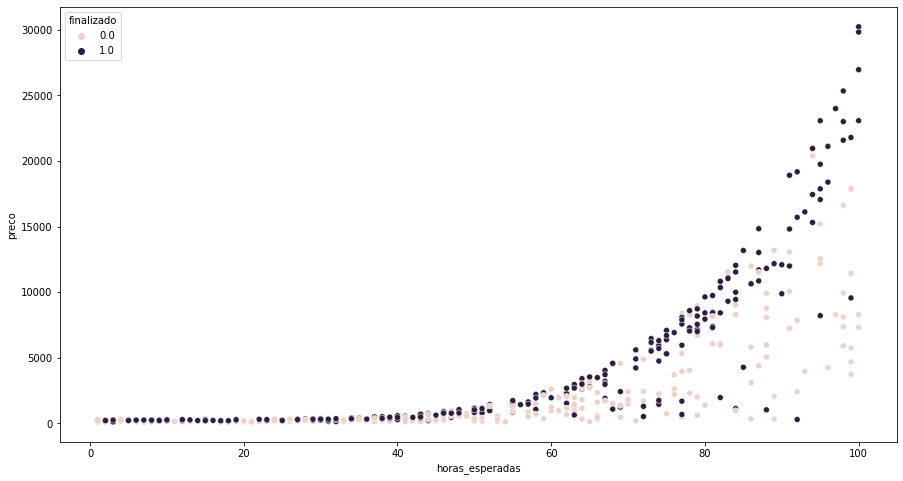

In [127]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='horas_esperadas', y='preco', data=dados, hue=teste_y);

In [128]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [129]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [130]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [131]:
Z = modelo.predict(pontos)
print(Z.shape)
print(xx.shape)

(10000,)
(100, 100)


In [132]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

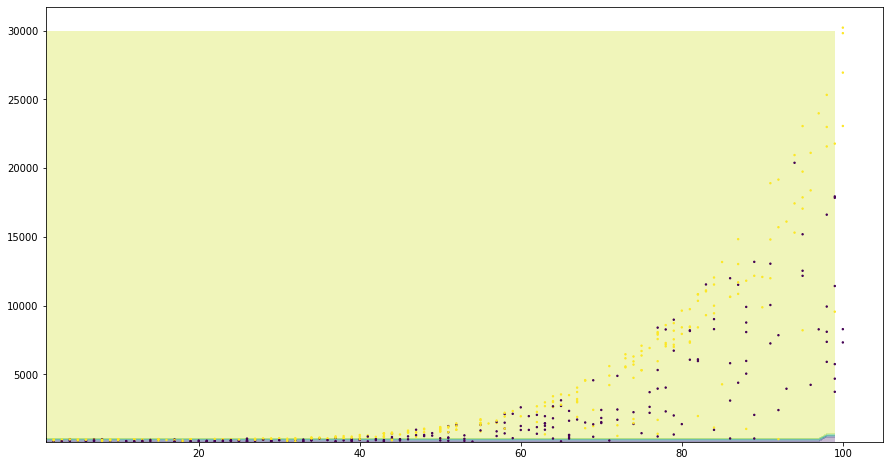

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2);

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A precisão foi de {acuracia*100:.2f}%\n')

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A precisão foi de 55.19%



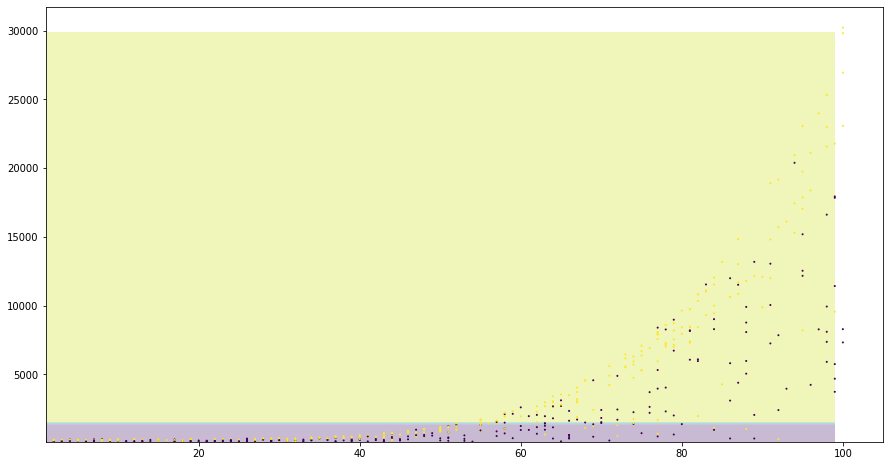

In [135]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A precisão foi de {acuracia*100:.2f}%\n')

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A precisão foi de 66.85%



In [137]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

AttributeError: ignored

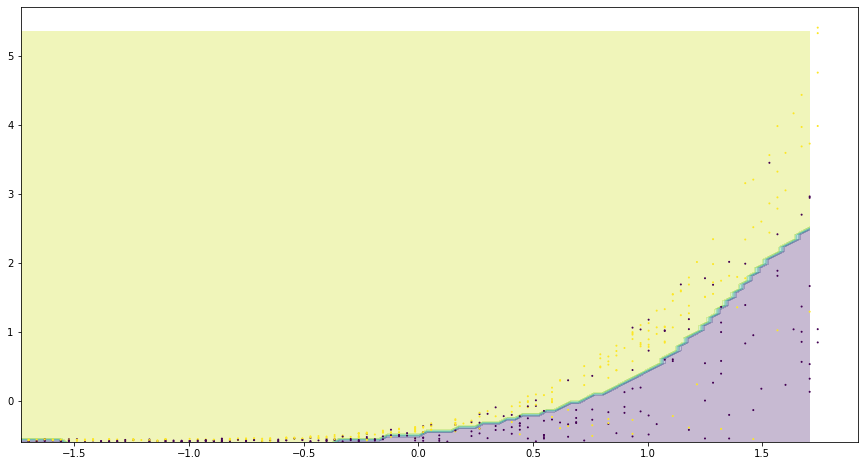

In [138]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1);

# Parte 4

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

dados = dados.rename(columns=a_renomear)

In [4]:
a_trocar = {
    'no': 0,
    'yes': 1
}

dados['vendido'] = dados['vendido'].map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [6]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [7]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A precisão foi de {acuracia*100:.2f}%\n')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A precisão foi de 62.80%



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print(f'A acurácia do dummy stratified foi {acuracia:.2f}%')

A acurácia do dummy stratified foi 52.44%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [13]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print(f'A acurácia do dummy mostfrequent foi {acuracia:.2f}%')

A acurácia do dummy mostfrequent foi 50.68%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A precisão foi de {acuracia:.2f}%\n')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A precisão foi de 77.48%



In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A precisão foi de {acuracia:.2f}%\n')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A precisão foi de 79.28%



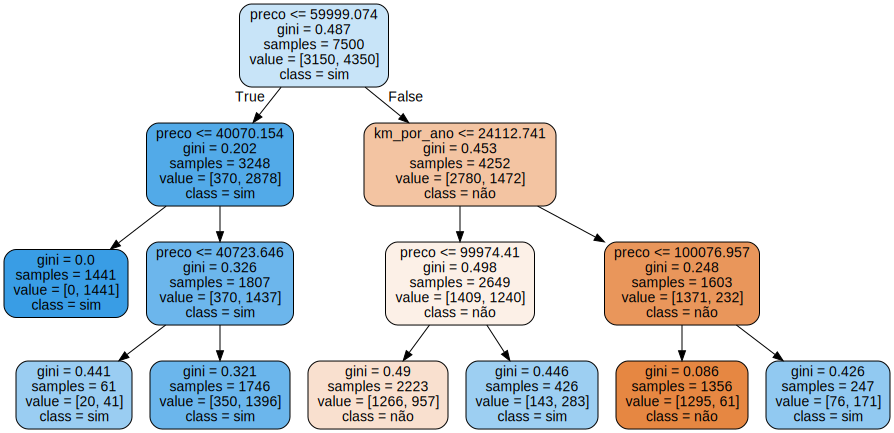

<Figure size 432x288 with 0 Axes>

In [34]:
from sklearn.tree import export_graphviz
import graphviz
from matplotlib import pyplot as plt

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True,
                           rounded=True, feature_names=features,
                           class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)

plt.savefig('grafico.jpg')
grafico